<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Julian_Gongora_A01793036/blob/main/A01793036__Actividad_Semanal_5_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

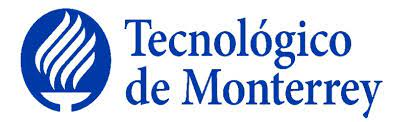

**Maestria: Inteligencia artificial aplicada (MNA)**

**Actividad Semanal-5 Repaso Transformación y reducción de dimensiones**

**Materia:Ciencia Y Analítica de Datos**

Estudiante A01793036 - Julian Gongora

Profesor Titular: PhD. María de la Paz Rico

Profesor Tutor: Victoria Guerrero Orozco



# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




In [10]:
#CODIGO EJERJCICIO 1
import numpy as np
from numpy import array
from numpy.linalg import eig
def pca (A):
  print("-------Matriz original-------")
  print(A)
  print("-----------------------------")
  # calcula la eigendescomposición
  values, vectors = eig(A)
  #print(values) #D
  #print(vectors) #W

  #Ejemplo de reconstrucción


  values, vectors = np.linalg.eig(A)

  W = vectors
  Winv = np.linalg.inv(W)
  D = np.diag(values)

  #la matriz B tiene que dar igual a A
  #reconstruye la matriz 
  print("-------Matriz reconstruida-------")
  # Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
  #ojo, estas multiplicando matrices, no escalares ;)
  #TU CODIGO AQUI-------------------------------------

  B=np.round(np.dot(np.dot(W,D),Winv))
  
  print("-----------------------------")
  print(B)
  return 

In [11]:
#Matriz 1
A=np.array([[3,0,2],[3,0,-2],[0,1,1]])
pca(A)

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
-------Matriz reconstruida-------
-----------------------------
[[ 3.+0.j  0.-0.j  2.-0.j]
 [ 3.-0.j  0.+0.j -2.+0.j]
 [ 0.+0.j  1.-0.j  1.+0.j]]


In [12]:
#Matriz 2
A2=np.array([[1,3,8],[2,0,0],[0,0,1]])
pca(A2)

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
-------Matriz reconstruida-------
-----------------------------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]


In [13]:
#Matriz 3
A3=np.array([[5,4,0],[1,0,1],[10,7,1]])
pca(A3)

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
-------Matriz reconstruida-------
-----------------------------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]


# **EJERCICIO 2: Compresión de imagenes**


In [2]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [3]:

#Funcion para cargar imagen
def imagenload(img):
  plt.style.use('classic')
  
  imggray = img.convert('LA')
  imgmat = np.array(list(imggray.getdata(band=0)),float)

  print(imgmat)

  imgmat.shape = (imggray.size[1],imggray.size[0])

  plt.figure(figsize=(9,6))
  plt.imshow(imgmat,cmap='gray')
  plt.show()
  print(img)
  U,D,V = np.linalg.svd(imgmat)
  plt.clf()
  return  U,D,V

In [4]:
# funcion para reconstruir la imagen.
def imagen_recons(n,U,D,V):
  nvalue =n
  #N seleccionado para conservar la calidad de la imagen es 140.

  reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
  plt.figure(figsize=(9,6))
  plt.imshow(reconstimg,cmap='gray')
  plt.show()
  print("La imagen está comprimida")
  plt.clf()
  return reconstimg.shape

[122. 123. 119. ...  60.  58.  62.]


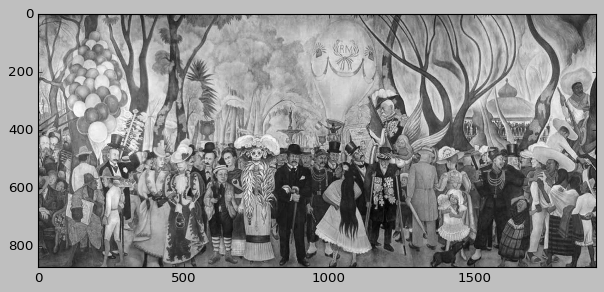

<PIL.Image.Image image mode=LA size=1920x870 at 0x7F0589D92AD0>


<Figure size 640x480 with 0 Axes>

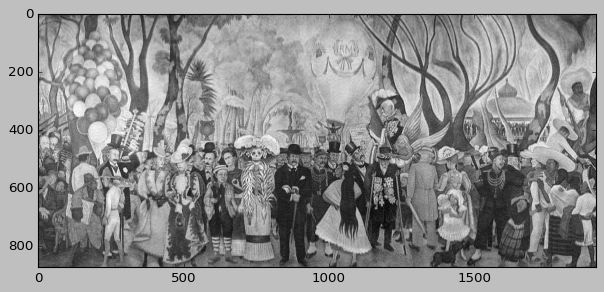

La imagen está comprimida


(870, 1920)

<Figure size 640x480 with 0 Axes>

In [7]:
#imagen 1
img = Image.open(urllib.request.urlopen('https://inba.gob.mx/multimedia/espacios-culturales/46/46-EC-BG-museo_mural_diego_rivera.jpg')).convert('LA')
U,D,V=imagenload(img)
imagen_recons(135,U,D,V)
#n seleccionado 135

[163. 164. 165. ...  63.  76.  81.]


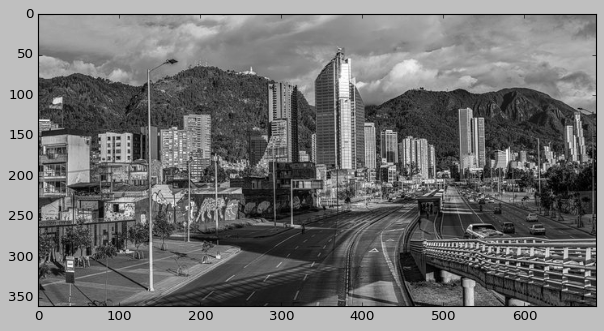

<PIL.Image.Image image mode=LA size=689x360 at 0x7FE9F7DDCF90>


<Figure size 640x480 with 0 Axes>

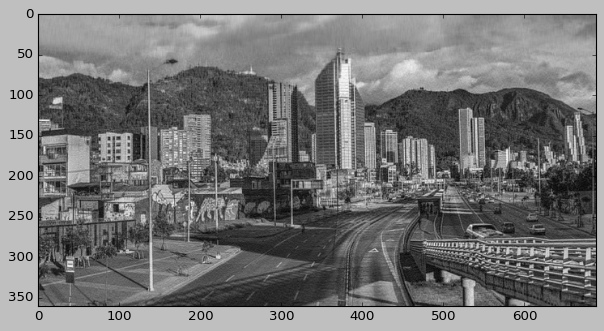

La imagen está comprimida


(360, 689)

<Figure size 640x480 with 0 Axes>

In [ ]:
#Imagen 2
img2 = Image.open(urllib.request.urlopen('https://t3.ftcdn.net/jpg/02/86/58/92/360_F_286589294_ltf4VzSymEFasogc59i2QrCyvSQ2thhV.jpg')).convert('LA')
U,D,V=imagenload(img2)
imagen_recons(150,U,D,V)
#n seleccionado 150


[ 85.  85.  74. ... 104. 110. 112.]


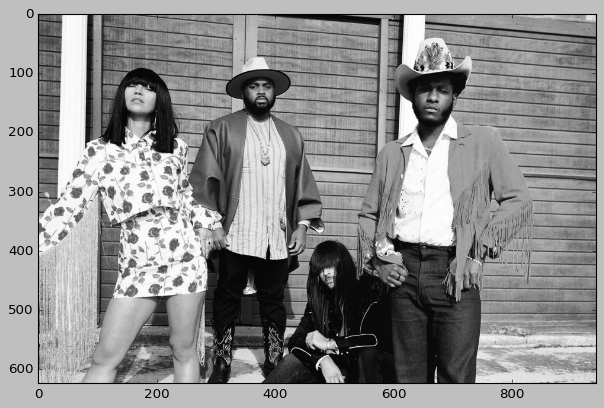

<PIL.Image.Image image mode=LA size=942x623 at 0x7F0589D92750>


<Figure size 640x480 with 0 Axes>

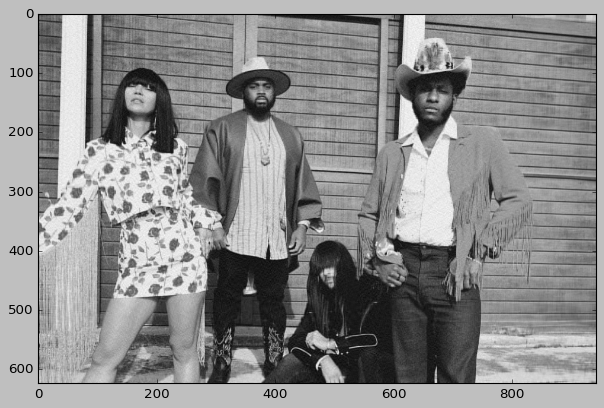

La imagen está comprimida


(623, 942)

<Figure size 640x480 with 0 Axes>

In [9]:
#Imagen 3
img3 = Image.open(urllib.request.urlopen('https://www.billboard.com/wp-content/uploads/2022/02/khruangbin-leon-bridges-credit-pooneh-ghana-2021-billboard-1548.jpg?w=942&h=623&crop=1')).convert('LA')
U,D,V=imagenload(img3)
imagen_recons(150,U,D,V)
#n seleccionado 150

# **EJERCICIO 3: Feature importances** 
Tutorial tomado del articulo "PCA clearly explained —When, Why, How to use it and feature importance: A guide in Python", echo por Serafeim Loukas, Mayo del 2020

In [15]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Carga de la base de datos para ejecutar el PCA.
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Aplicamos el Z-score para , de modo que cada variable original (columna de X) tiene media cero y desviación estándar unitaria.
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# Aplicamos la formula del PCA 
pca = PCA(n_components=2) #En este caso se estimaron dos componentes de PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

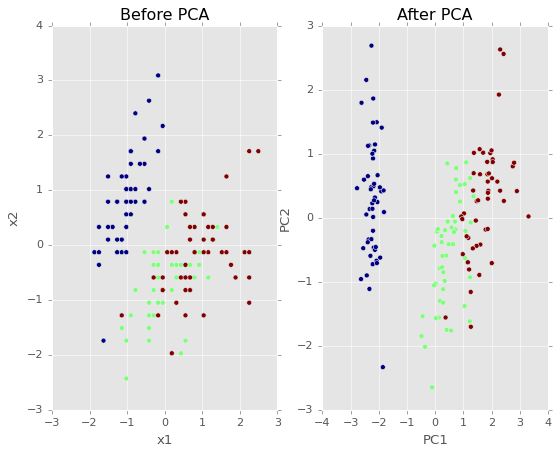

In [16]:
#Se grafican los datos en dos variables, antes y despeus de aplicar el PCA para aprecir la diferencia del proceso y su ventaja visual.
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

#Como se puede observar el existe una diferencia relacion entre los verdes y rojos. Y una menor relacon entre los azules y rojos. 

In [17]:
print(pca.explained_variance_ratio_)

#Con este comando se puede observar el espacio PCA las variables, la varianza se maximiza a lo largo de PC1 tiene casi el 73 % de la varianza y PC2 el 22 % de la varianza. La suma, representa el 95%.

[0.72962445 0.22850762]


In [18]:
np.cov(X_new.T)
##Por medio de la matriz de covarianza del espacio reducido se calcula la máxima varianza.

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [19]:
pca.explained_variance_ 
#Como prueba de que los valores propios de la matriz de covarianza original son iguales a las varianzas del espacio reducido.

array([2.93808505, 0.9201649 ])

In [20]:
#Para finalizar vamos a graficar el PCA analisis que se se ejecutó por medio de la función biplot. 
#Cabe resalar que esta es la propia interpretación de dicha herramieta del autor del código.

def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

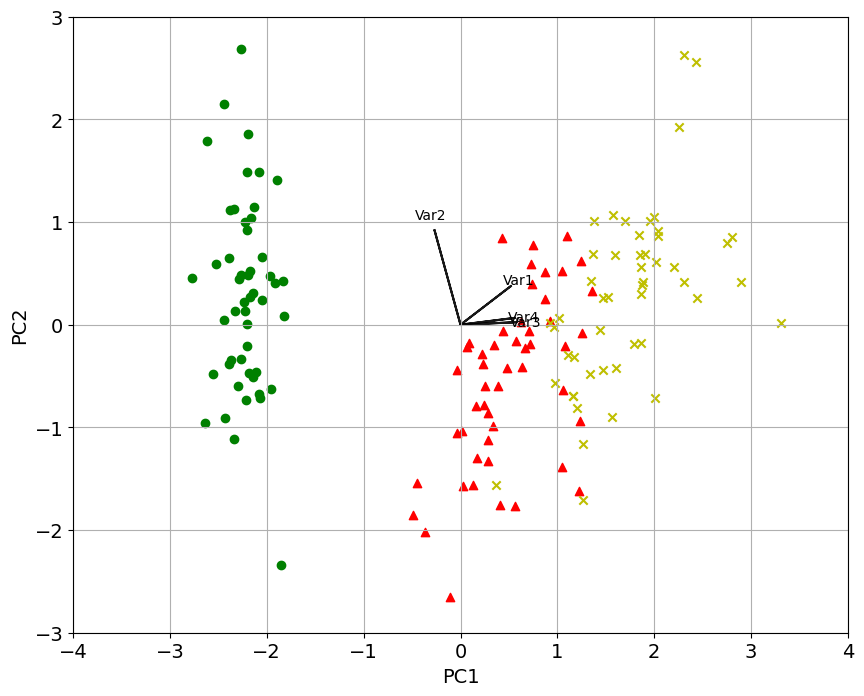

In [ ]:
#Se llama la libreia matplotlib, muy popular para proveer de funciones gráficas.

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [24]:
#Para un mejor analisíss se obtiene la correlacion de variables entre sí. 
#Por ejemplo la Var 3 y la Var 4 están intimamete positivamente correlacionados (+0.96). 
np.corrcoef(X[:,2], X[:,3])[1,0]

0.9628654314027957

In [22]:
#Por ejemplo la Var 2 y la Var 3 están negativamente (-0.43).
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

In [25]:
#Por ejemplo la Var 1 y la Var 2 están liegero negativo (-0.12).
np.corrcoef(X[:,0], X[:,1])[1,0]

-0.11756978413300219

In [27]:
#Por ejemplo la Var 2 y la Var 4 están liegero negativo (-0.37).
np.corrcoef(X[:,1], X[:,3])[1,0]

-0.36612593253643955

# **Preguntas Actividad 5**

**1.** ¿Qué es feature importance y para que nos sirve?

**RTA_1:** El feature importance score es una puntuación que ayuda a cuantificar la proporción en que una característica específica impacta las decisiones de un modelo específico. En otras palabras: nos ayuda a explicar/entender las decisiones tomadas por un modelo específico.

Como afirma Samo, cabe resaltar que los feature importance score, no verifica si un modelo funciona bien. Los puntajes de importancia de características son excelentes para la explicación del modelo, pero no deben usarse más allá de eso.


**2.** ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?

**RTA_3**
Dentro del ejrcicio con el método PCA se encontro que: 
-	Se utilizan todas las variables en la proyección, pero con un espacio dimensional mejor (k<p). 
-	Solo se consideran relaciones lineales entre las variables. Es posible que exista otro tipo de relación entre variables que este modelo no considera, una posible naturaleza multivariante. 


**3.** ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?

**RTA_4** PCA es una herramienta que facilita la selección de características cuando existen múltiples variables. Este método selecciona las variables acordes a la magnitud en valores absolutos de menor a mayor. Esto resulta muy útil para cualquier problema de la vida real, donde se involucra una gran cantidad de variables y se hace necesario encontrar este que variables están correlacionas posiiva o negativamente. 

# **Bibliografia:** 

*   Loukas, S. (2020, May 30). PCA clearly explained —When, Why, How to use it and feature importance: A guide in Python. www.towardsdatascience.com. https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e}
*   Wang, Z. (2019, 16 marzo). PCA and SVD explained with numpy. www.towardsdatascience.com. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
* Samo, Y.-L. K. (2022, marzo 23). Feature engineering with game theory: Beyond SHAP values. The Productive Machine Learning Engineer. https://blog.kxy.ai/feature-engineering-with-game-theory-beyond-shap/ 
* Using principal component analysis (PCA) for feature selection. (s/f). Cross Validated. Recuperado el 26 de octubre de 2022, de https://stats.stackexchange.com/questions/27300/using-principal-component-analysis-pca-for-feature-selection


